<a href="https://colab.research.google.com/github/Joheon/Covid-19-Analysis/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Joheon CP**

**Timeline Analysis : Covid-19**

● Create a storyboard showing spread of Covid-19 cases in your country or
any region (Asia, Europe, BRICS etc) using Tableau, Power BI or SAP

**Dataset:** Daily updated .csv file on https://bit.ly/30d2gdi

In [92]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.colors as mcolors

In [93]:
#Reading the Data
covid_data = pd.read_csv('owid-covid-data.csv');
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [94]:
covid_data.shape

(100191, 60)

In [95]:
covid_data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
100186,ZWE,Africa,Zimbabwe,2021-06-30,49864.0,1331.0,912.000,1789.0,28.0,13.857,3354.925,89.552,61.361,120.367,1.884,0.932,1.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10699.0,653586.0,43.974,0.72,5597.0,0.377,0.163,6.1,tests performed,1332438.0,777161.0,555277.0,16841.0,23656.0,8.96,5.23,3.74,1592.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
100187,ZWE,Africa,Zimbabwe,2021-07-01,51221.0,1357.0,987.857,1808.0,19.0,14.143,3446.226,91.301,66.465,121.645,1.278,0.952,1.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1341960.0,782698.0,559262.0,9522.0,21235.0,9.03,5.27,3.76,1429.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
100188,ZWE,Africa,Zimbabwe,2021-07-02,52663.0,1442.0,1063.714,1841.0,33.0,17.143,3543.246,97.020,71.568,123.865,2.220,1.153,1.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1352718.0,788004.0,564714.0,10758.0,18686.0,9.10,5.30,3.80,1257.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
100189,ZWE,Africa,Zimbabwe,2021-07-03,53665.0,1002.0,1092.429,1859.0,18.0,19.143,3610.662,67.416,73.500,125.076,1.211,1.288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1359587.0,791901.0,567686.0,6869.0,15726.0,9.15,5.33,3.82,1058.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
100190,ZWE,Africa,Zimbabwe,2021-07-04,54474.0,809.0,1147.429,1878.0,19.0,20.286,3665.092,54.431,77.201,126.355,1.278,1.365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1361210.0,793077.0,568133.0,1623.0,12279.0,9.16,5.34,3.82,826.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [96]:
# Identifying the columns present
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [97]:
# Descripting of the numerical attributes present in the dataset
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,9.658400e+04,96581.000000,95571.000000,8.643100e+04,86587.000000,95571.000000,96070.000000,96067.000000,95062.000000,85930.000000,86086.000000,95062.000000,80747.000000,10110.000000,10110.000000,12561.000000,12561.000000,884.000000,884.000000,1569.000000,1569.000000,4.489700e+04,4.457100e+04,44571.000000,44897.000000,5.222300e+04,52223.000000,48752.000000,48154.000000,1.688900e+04,1.606900e+04,1.322700e+04,1.409200e+04,2.916900e+04,16889.000000,16069.000000,13227.000000,29169.000000,84096.000000,9.954300e+04,93095.000000,89536.000000,88530.000000,89041.000000,89882.000000,60664.000000,89908.000000,92220.000000,70318.000000,69291.000000,45183.000000,81898.000000,95140.000000,90052.000000,3503.000000
mean,1.075182e+06,6037.161108,6064.239231,2.902387e+04,146.341656,131.873079,13250.899411,76.034819,76.368007,292.530711,1.551272,1.397426,1.003264,1055.714540,26.158057,4588.569302,167.666129,272.980225,20.485705,3515.170244,107.902145,4.804930e+04,7.823804e+06,313.819559,2.129569,4.562064e+04,2.042962,0.088605,163.458469,3.250969e+07,1.807742e+07,1.004126e+07,6.879986e+05,3.337151e+05,24.562930,16.066938,10.116096,3257.047928,58.264416,1.247343e+08,386.855313,30.561545,8.788635,5.563688,19283.049765,13.410341,258.515870,7.928332,10.566552,32.694407,50.829103,3.027553,73.236389,0.727318,18.243991
std,7.357601e+06,37736.893444,37492.305362,1.732031e+05,800.604241,744.356943,24303.088513,199.844999,158.676600,527.902967,3.963858,3.035561,0.352054,2872.811701,27.010674,11795.288351,209.650558,566.882729,35.787305,10762.554709,214.170594,1.763528e+05,3.412702e+07,734.919683,5.958459,1.607075e+05,5.063894,0.097168,888.905899,1.735545e+08,9.739503e+07,4.898578e+07,3.246221e+06,2.206431e+06,31.351383,18.728235,14.017957,4441.645073,21.040078,6.800168e+08,1801.819808,9.131036,6.211138,4.237125,19996.118465,19.961789,119.050343,4.149367,10.466943,13.486090,31.758780,2.458746,7.559568,0.150369,36.030922
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-23.010000,0.000000e+00,0.000000,0.000000,1.100000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.285000e+03,2.000000,7.571000,5.400000e+01,0.000000,0.000000,262.667000,0.212000,1.295000,8.050000,0.000000,0.000000,0.840000,32.000000,4.793000,118.000000,23.443000,10.747000,1.677000,50.000000,9.351000,1.658000e+03,1.624915e+05,14.386500,0.144000,1.741000e+03,0.142000,0.017000,7.700000,1.247530e+05,9.481800e+04,5.118100e+04,4.562500e+03,8.790000e

In [98]:
#Checking for count of all the unique values present for each attribute
covid_data.nunique()

iso_code                                   230
continent                                    6
location                                   230
date                                       552
total_cases                              53494
new_cases                                12931
new_cases_smoothed                       24977
total_deaths                             20539
new_deaths                                3049
new_deaths_smoothed                       6925
total_cases_per_million                  75011
new_cases_per_million                    41939
new_cases_smoothed_per_million           47456
total_deaths_per_million                 47162
new_deaths_per_million                    7863
new_deaths_smoothed_per_million           9277
reproduction_rate                          369
icu_patients                              2605
icu_patients_per_million                  5632
hosp_patients                             5049
hosp_patients_per_million                 9457
weekly_icu_ad

In [99]:
# Checking for count of NULL values for each column 
covid_data.isnull().sum()

iso_code                                     0
continent                                 4696
location                                     0
date                                         0
total_cases                               3607
new_cases                                 3610
new_cases_smoothed                        4620
total_deaths                             13760
new_deaths                               13604
new_deaths_smoothed                       4620
total_cases_per_million                   4121
new_cases_per_million                     4124
new_cases_smoothed_per_million            5129
total_deaths_per_million                 14261
new_deaths_per_million                   14105
new_deaths_smoothed_per_million           5129
reproduction_rate                        19444
icu_patients                             90081
icu_patients_per_million                 90081
hosp_patients                            87630
hosp_patients_per_million                87630
weekly_icu_ad

In [100]:
# Continents in terms of occurence of covid cases on basis of iso_codes
covid_data.continent.value_counts()[0:10]

Africa           25791
Europe           23742
Asia             23715
North America    12409
South America     6015
Oceania           3823
Name: continent, dtype: int64

**Analyzing cases worldwide**

In [101]:

dataset = covid_data[covid_data['date']=='2021-05-01']
dataset = dataset[~dataset['location'].isin(['World','International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
432,AFG,Asia,Afghanistan,2021-05-01,59939.0,194.0,172.714,2631.0,6.0,8.429,1539.727,4.984,4.437,67.586,0.154,0.217,1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13921.0,NaN,NaN,NaN,358.0,26.85,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511,NaN
940,OWID_AFR,NaN,Africa,2021-05-01,4565548.0,7849.0,9763.000,122068.0,284.0,318.143,3405.605,5.855,7.283,91.055,0.212,0.237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18680584.0,14102884.0,4896370.0,126929.0,255806.0,1.39,1.05,0.37,191.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1436,ALB,Europe,Albania,2021-05-01,131185.0,100.0,110.857,2396.0,2.0,3.429,45585.169,34.749,38.521,832.580,0.695,1.191,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2962.0,618714.0,214.995,1.029,2390.0,0.830,0.046,21.6,tests performed,494028.0,NaN,NaN,17125.0,13423.0,17.17,NaN,NaN,4664.0,54.63,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1932,DZA,Africa,Algeria,2021-05-01,122311.0,203.0,225.000,3261.0,8.0,9.000,2789.238,4.629,5.131,74.365,0.182,0.205,1.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22664.0,NaN,NaN,NaN,517.0,70.83,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,NaN
2422,AND,Europe,Andorra,2021-05-01,13232.0,0.0,29.714,125.0,0.0,0.143,171254.773,0.000,384.576,1617.809,0.000,1.849,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,435.0,5.630,0.068,14.6,people tested,NaN,NaN,NaN,NaN,124.0,NaN,NaN,NaN,1605.0,65.74,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,NaN
2894,AGO,Africa,Angola,2021-05-01,26815.0,163.0,189.000,600.0,4.0,3.286,815.882,4.959,5.751,18.256,0.122,0.100,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8959.0,NaN,NaN,NaN,273.0,58.33,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,NaN
3045,AIA,North America,Anguilla,2021-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253.0,NaN,NaN,NaN,16864.0,NaN,1.500200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88,NaN,NaN
3515,ATG,North America,Antigua and Barbuda,2021-05-01,1232.0,0.0,0.714,32.0,0.0,0.143,12580.672,0.000,7.294,326.771,0.000,1.459,0.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,NaN,NaN,NaN,909.0,NaN,9.792800e+04,231.845,32.1,6.933,4.631,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.778,NaN
4066,ARG,South America,Argentina,2021-05-01,2993865.0,16502.0,21141.857,64096.0,231.0,374.571,66242.140,365.123,467.784

In [102]:
# looking at different locations
covid_data["location"].value_counts()

Argentina                          551
Mexico                             551
Thailand                           548
Peru                               546
Taiwan                             536
                                  ... 
Cook Islands                        36
British Virgin Islands              36
Pitcairn                             7
Bonaire Sint Eustatius and Saba      1
Turkmenistan                         1
Name: location, Length: 230, dtype: int64

In [103]:
# covid cases in india

india=covid_data[covid_data["location"]=="India"]

**Data Visualization**

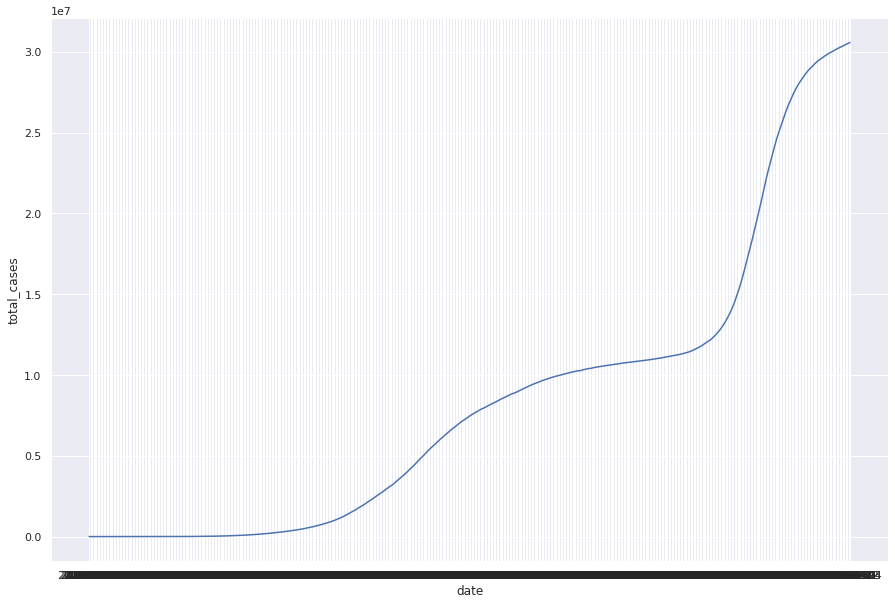

In [104]:
#Data Visualization
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india)
plt.show()

In [105]:
india_last_5_days=india.tail()

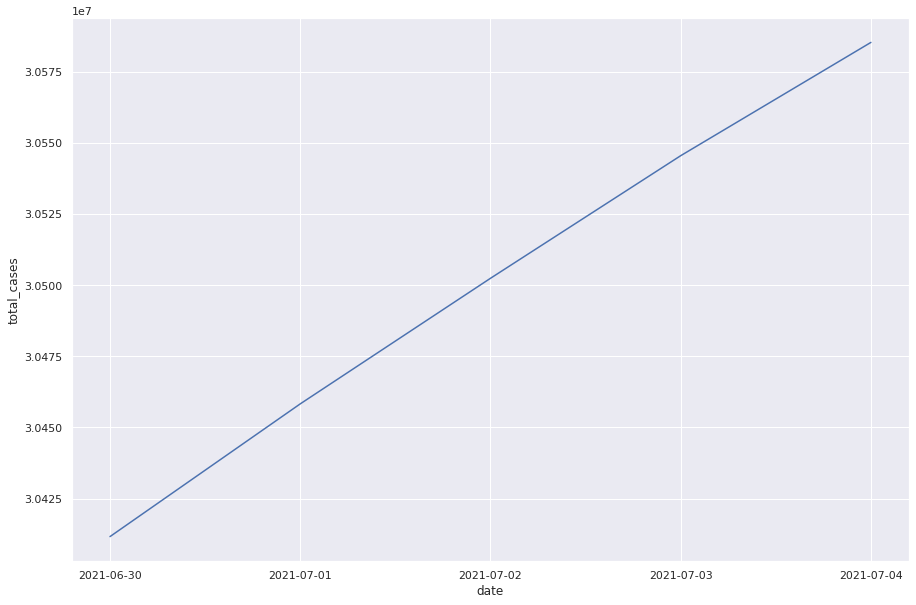

In [106]:
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

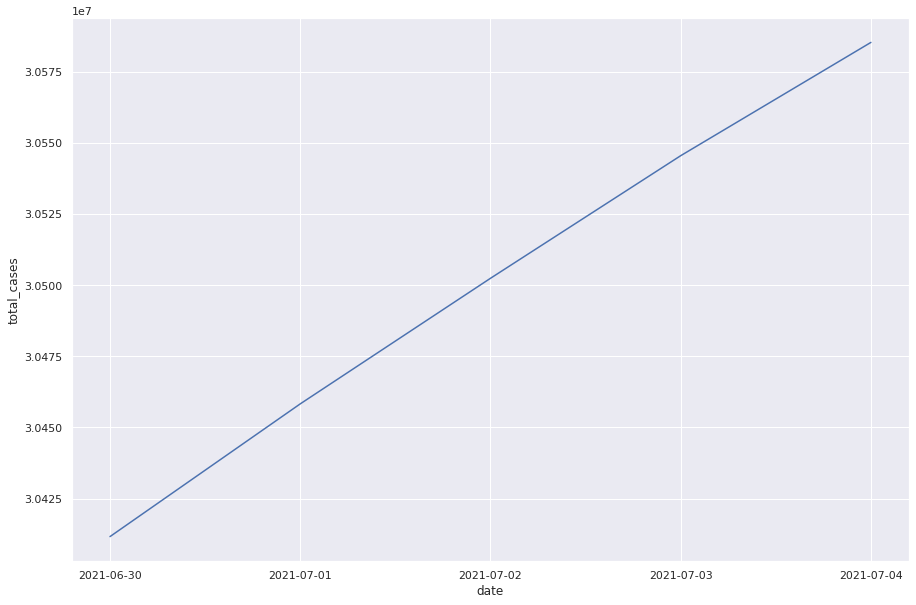

In [107]:
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

**Covid cases in Brazil**

In [108]:
# covid cases in Brazil

brazil=covid_data[covid_data["location"]=="Brazil"]

In [109]:
brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
12741,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12742,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12743,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12744,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,9.91
12745,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN


In [110]:
brazil_last_5_days=brazil.tail()


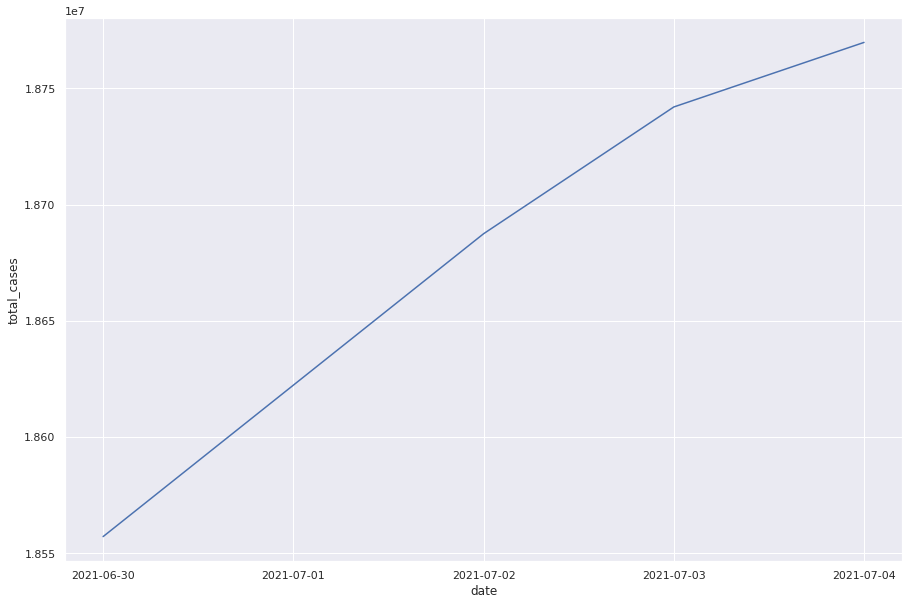

In [111]:
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=brazil_last_5_days)
plt.show()

In [112]:
# understanding cases of india,china and japan

india_japan_china=covid_data[(covid_data["location"]=="India") | (covid_data["location"]=="China") | (covid_data["location"]=="Japan")]

**Total Cases**

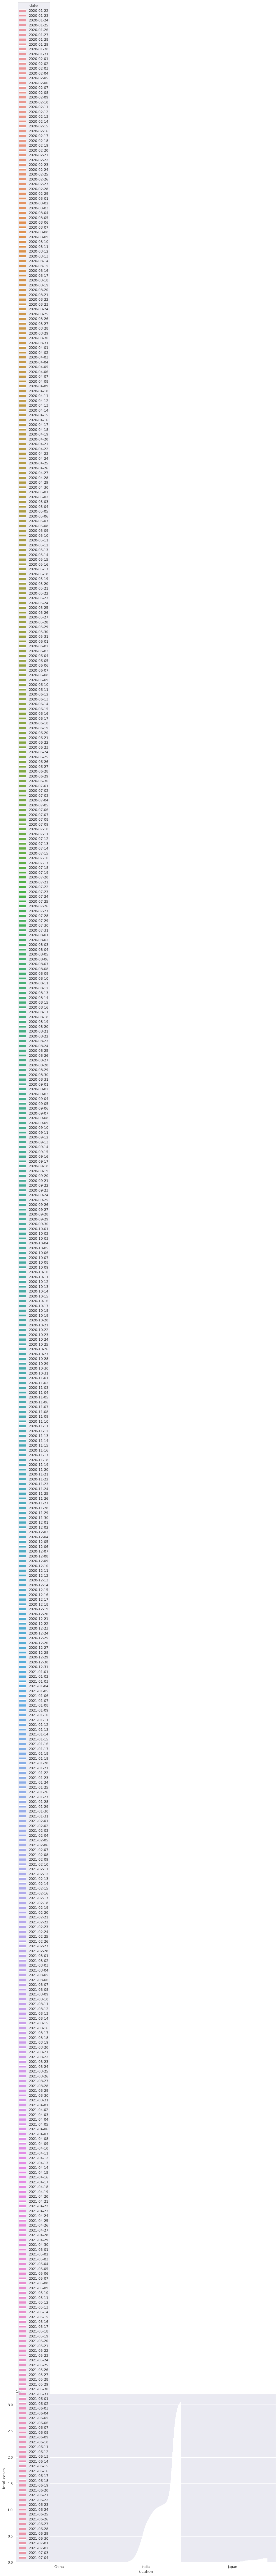

In [113]:
sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x="location",y="total_cases",data=india_japan_china,hue="date")
plt.show()

In [114]:
# understanding cases of germany and spain


germany_spain=covid_data[(covid_data["location"]=="Germany") | (covid_data["location"]=="Spain")]

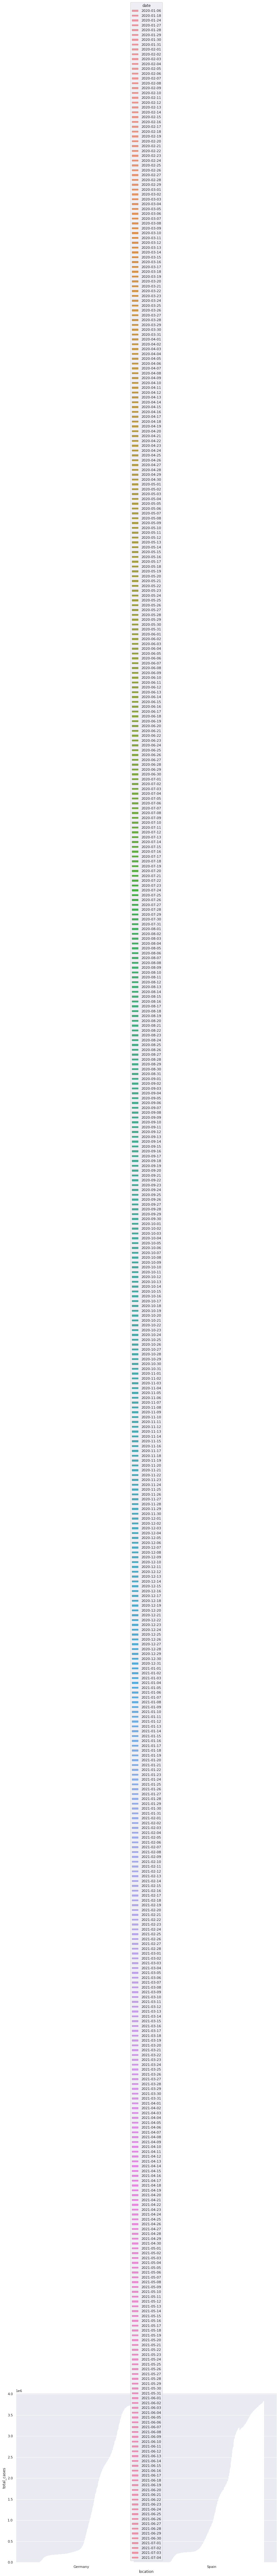

In [115]:
# total cases 

sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x="location",y="total_cases",data=germany_spain,hue="date")
plt.show()


In [116]:
# getting latset data

last_day_cases=covid_data[(covid_data["date"]=="2021-07-04")]
last_day_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
496,AFG,Asia,Afghanistan,2021-07-04,120216.0,0.0,1232.000,4962.0,0.0,63.286,3088.136,0.000,31.648,127.465,0.000,1.626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,NaN
1004,OWID_AFR,NaN,Africa,2021-07-04,5665391.0,31580.0,36161.857,145539.0,626.0,631.571,4226.017,23.557,26.974,108.563,0.467,0.471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.192586e+07,3.638520e+07,15870458.0,27680.0,355313.0,3.87,2.71,1.18,265.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1500,ALB,Europe,Albania,2021-07-04,132535.0,1.0,3.286,2456.0,0.0,0.000,46054.278,0.347,1.142,853.430,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.885500e+05,5.717590e+05,416791.0,NaN,7178.0,34.35,19.87,14.48,2494.0,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,NaN
1996,DZA,Africa,Algeria,2021-07-04,141471.0,464.0,429.429,3755.0,10.0,8.857,3226.172,10.581,9.793,85.631,0.228,0.202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,NaN
2486,AND,Europe,Andorra,2021-07-04,13918.0,0.0,5.143,127.0,0.0,0.000,180133.307,0.000,66.561,1643.694,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98164,VNM,Asia,Vietnam,2021-07-04,20261.0,951.0,645.857,86.0,2.0,1.429,208.150,9.770,6.635,0.884,0.021,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,NaN
98793,OWID_WRL,NaN,World,2021-07-04,183781831.0,322437.0,383998.571,3977058.0,6339.0,7704.286,23577.495,41.366,49.263,510.219,0.813,0.988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.221733e+09,1.898747e+09,882770708.0,23714318.0,35637534.0,41.33,24.36,11.33,4572.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN
99244,YEM,Asia,Yemen,2021-07-04,6929.0,3.0,3.000,1361.0,0.0,0.143,232.314,0.101,0.101,45.631,0.000,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [117]:


max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
98793,OWID_WRL,NaN,World,2021-07-04,183781831.0,322437.0,383998.571,3977058.0,6339.0,7704.286,23577.495,41.366,49.263,510.219,0.813,0.988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.221733e+09,1.898747e+09,882770708.0,23714318.0,35637534.0,41.33,24.36,11.33,4572.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN
5247,OWID_ASI,NaN,Asia,2021-07-04,56405958.0,138576.0,143687.286,799694.0,2207.0,2303.857,12156.856,29.866,30.968,172.354,0.476,0.497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.004322e+09,1.148601e+09,391377228.0,17379681.0,26579694.0,43.20,24.76,8.44,5729.0,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30660,OWID_EUR,NaN,Europe,2021-07-04,48538764.0,60331.0,66959.714,1109009.0,744.0,995.143,64832.451,80.583,89.437,1481.286,0.994,1.329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.219238e+08,3.162761e+08,216676975.0,2061509.0,4106684.0,69.71,42.24,28.94,5485.0,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66749,OWID_NAM,NaN,North America,2021-07-04,39794512.0,13340.0,28398.286,904252.0,175.0,535.143,67212.262,22.531,47.964,1527.266,0.296,0.904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.421602e+08,2.558530e+08,198459884.0,1242510.0,2303862.0,74.68,43.21,33.52,3891.0,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95478,USA,North America,United States,2021-07-04,33717567.0,3697.0,13164.000,605526.0,33.0,214.000,101864.947,11.169,39.770,1829.369,0.100,0.647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.306043e+08,1.824128e+08,157323738.0,633702.0,1039561.0,98.85,54.54,47.04,3108.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59038,FSM,Oceania,Micronesia (country),2021-07-04,1.0,0.0,0.000,NaN,NaN,0.000,8.694,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.150210e+05,150.777,23.0,4.810,2.392,3299.464,16.0,454.343,12.02,NaN,NaN,NaN,NaN,67.88,0.620,NaN
22828,CUW,North America,Curacao,2021-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680030e+05,8.902500e+04,78978.0,51.0,220.0,102.38,54.25,48.13,1341.0,NaN,1.641000e+05,362.644,41.7,16.367,10.068,NaN,NaN,NaN,11.62,NaN,NaN,NaN,NaN,78.88,NaN,NaN
31346,FR

In [118]:
# top 5 countries with maximum case
max_cases_country[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
5247,OWID_ASI,NaN,Asia,2021-07-04,56405958.0,138576.0,143687.286,799694.0,2207.0,2303.857,12156.856,29.866,30.968,172.354,0.476,0.497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.004322e+09,1.148601e+09,391377228.0,17379681.0,26579694.0,43.20,24.76,8.44,5729.0,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30660,OWID_EUR,NaN,Europe,2021-07-04,48538764.0,60331.0,66959.714,1109009.0,744.0,995.143,64832.451,80.583,89.437,1481.286,0.994,1.329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.219238e+08,3.162761e+08,216676975.0,2061509.0,4106684.0,69.71,42.24,28.94,5485.0,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66749,OWID_NAM,NaN,North America,2021-07-04,39794512.0,13340.0,28398.286,904252.0,175.0,535.143,67212.262,22.531,47.964,1527.266,0.296,0.904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.421602e+08,2.558530e+08,198459884.0,1242510.0,2303862.0,74.68,43.21,33.52,3891.0,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95478,USA,North America,United States,2021-07-04,33717567.0,3697.0,13164.000,605526.0,33.0,214.000,101864.947,11.169,39.770,1829.369,0.100,0.647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.306043e+08,1.824128e+08,157323738.0,633702.0,1039561.0,98.85,54.54,47.04,3108.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
83817,OWID_SAM,NaN,South America,2021-07-04,33319628.0,78030.0,108382.714,1017409.0,2584.0,3236.429,77350.835,181.145,251.608,2361.894,5.999,7.513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.912762e+08,1.339903e+08,57903048.0,2923220.0,2150302.0,44.40,31.11,13.44,4992.0,NaN,4.307598e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


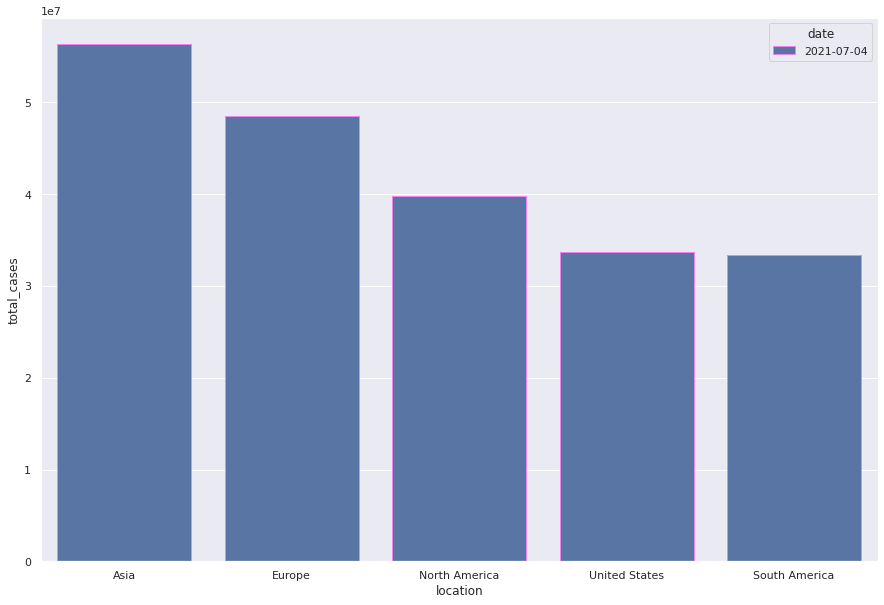

In [119]:
# plot on bar plot

sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="date",  edgecolor='violet')
plt.show()